Imports

In [1]:
import pandas as pd
from pingouin import rcorr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from utils.formatting import normalize_string, get_formula

In [2]:
df_student = pd.read_csv("datasets/student_performance.csv")

df_student.columns = normalize_string(df_student.columns)

In [3]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hours_studied                     10000 non-null  int64  
 1   previous_scores                   10000 non-null  int64  
 2   extracurricular_activities        10000 non-null  object 
 3   sleep_hours                       10000 non-null  int64  
 4   sample_question_papers_practiced  10000 non-null  int64  
 5   performance_index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df_student.describe()

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
rcorr(
    df_student,
    method="pearson",
    upper="pval",
    stars=True,
    pval_stars={0.01: "***", 0.05: "**", 0.1: "*"},
)

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
hours_studied,-,,,*,***
previous_scores,-0.012,-,,,***
sleep_hours,0.001,0.006,-,,***
sample_question_papers_practiced,0.017,0.008,0.004,-,***
performance_index,0.374,0.915,0.048,0.043,-


## Diagnosis

Text(0.5, 1.0, 'Correlation Matrix')

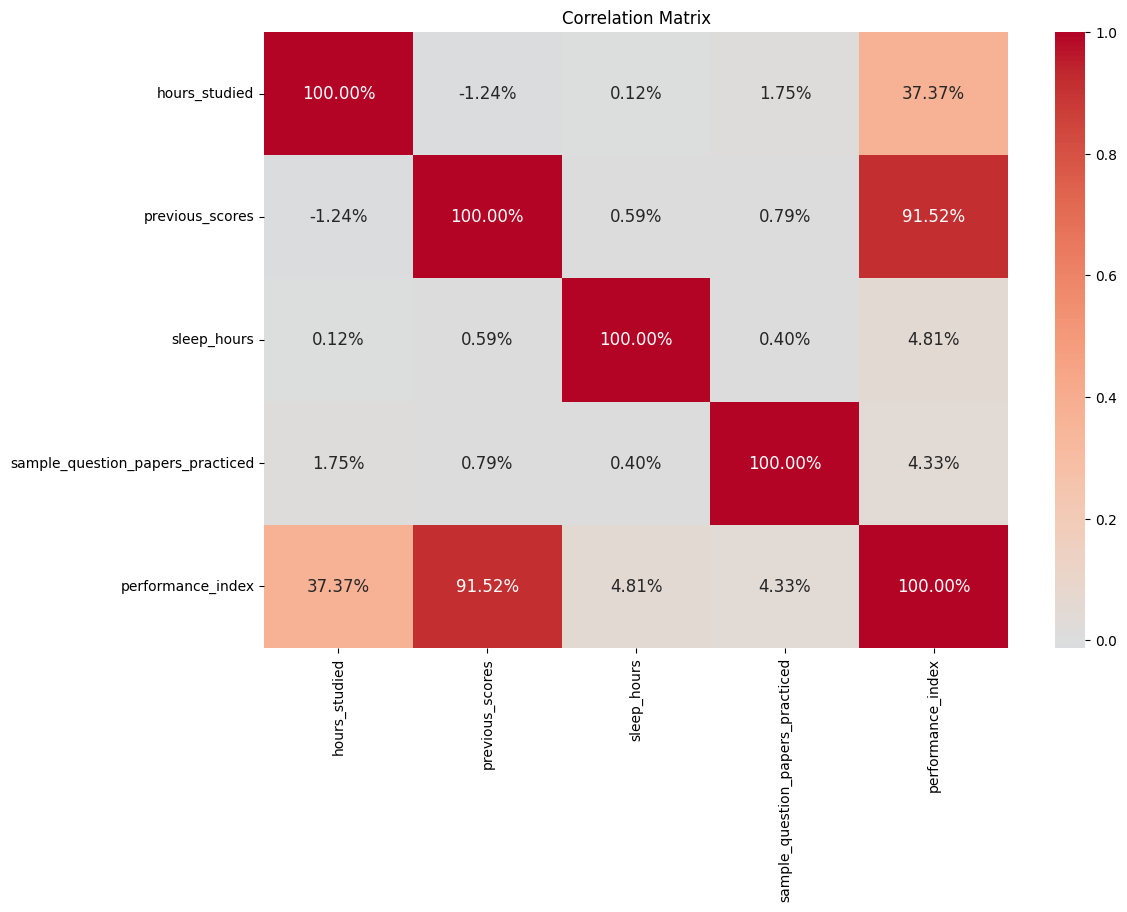

In [ ]:
plt.figure(figsize=(12, 8), dpi=100)

corr_matrix = df_student.select_dtypes(exclude=object).corr()

ax = sns.heatmap(
    data=corr_matrix,
    cmap="coolwarm",
    center=0,
    annot=corr_matrix.map(lambda x: f"{x:.2%}"),
    fmt="",
    annot_kws={"size":12}
)

plt.title("Correlation Matrix", fontsize=12)

In [11]:
formula = get_formula(df_student, "performance_index")

# model = smf.ols(data=df_student, formula=formula).fit()

UnboundLocalError: cannot access local variable 'exog' where it is not associated with a value

In [ ]:
model.summary()